# Problem Statement

The diamond industry is highly competitive and relies on accurate and timely pricing information. The prices of diamonds depend on various factors such as carat weight, cut, clarity, and color, making it challenging to accurately predict the price. Traditional methods of diamond pricing rely on human experts, which are often subjective and can lead to pricing disparities.

The objective of this project is to develop a machine learning model that can predict the price of diamonds based on their attributes. The model should be able to accurately predict diamond prices, considering multiple factors and providing an objective and consistent pricing strategy. This will help diamond merchants and investors to make informed decisions while buying and selling diamonds, ultimately leading to a more transparent and efficient diamond market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#magic command

# Important Dataset

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Preprocessing & Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [8]:
df.shape

(53940, 10)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# checking which columns have zero values to avoid biased or static behavior of data
df[df[df.columns]==0].count()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [11]:
#replacing zeros with mean of data
df['x'] = df['x'].replace(0, df['x'].mean())
df['y'] = df['y'].replace(0, df['y'].mean())
df['z'] = df['z'].replace(0, df['z'].mean())

In [12]:
# Now no zero entry exists
df[df[df.columns]==0].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
#adding new column which will reduce the pre-processing
df['dimensions'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimensions
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


# Data Insights for understanding trend

<AxesSubplot:xlabel='cut', ylabel='price'>

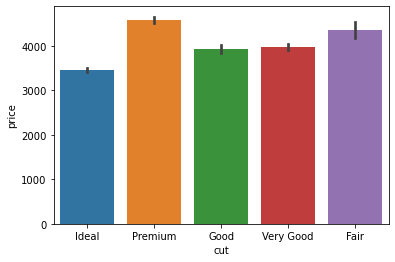

In [14]:
sns.barplot(data = df, x = df.cut, y = df.price)

<AxesSubplot:xlabel='price', ylabel='carat'>

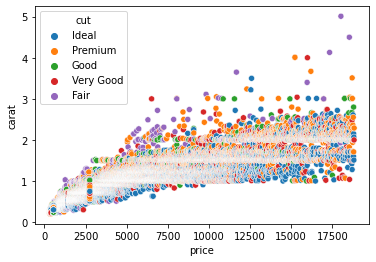

In [15]:
#checking linearity of of data to understand which model will be useful
sns.scatterplot(data=df, x=df['price'], y=df['carat'], hue = df.cut)

<AxesSubplot:xlabel='dimensions', ylabel='carat'>

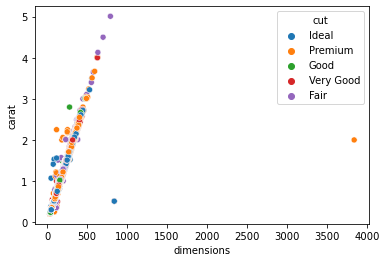

In [16]:
#few outliers exists but they will not affect the dataset as much
sns.scatterplot(data=df, x=df['dimensions'], y=df['carat'], hue = df.cut)

In [17]:
# Calculate the interquartile range to remove outliers
Q1 = df['dimensions'].quantile(0.25)
Q3 = df['dimensions'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['dimensions'] < Q1 - 1.5*IQR) | (df['dimensions'] > Q3 + 1.5*IQR)]
# Remove outliers
df = df[(df['dimensions'] >= Q1 - 1.5*IQR) & (df['dimensions'] <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='dimensions', ylabel='carat'>

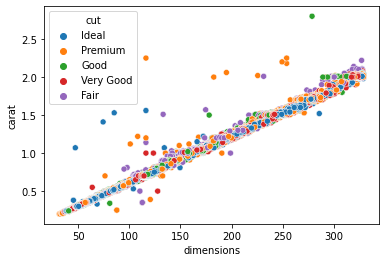

In [18]:
# you can pretty much see that we have make our line more linear and have removed the outliers
sns.scatterplot(data=df, x=df['dimensions'], y=df['carat'], hue = df.cut)

<AxesSubplot:xlabel='color', ylabel='price'>

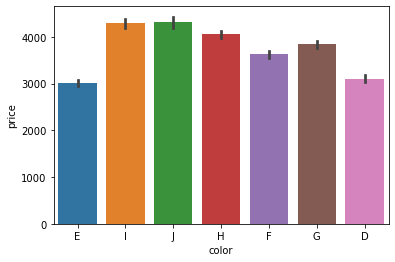

In [19]:
sns.barplot(data = df, x = df.color, y = df.price)

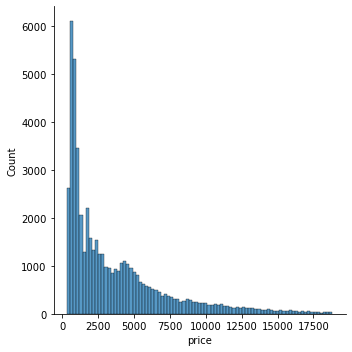

In [20]:
sns.displot(df.price)

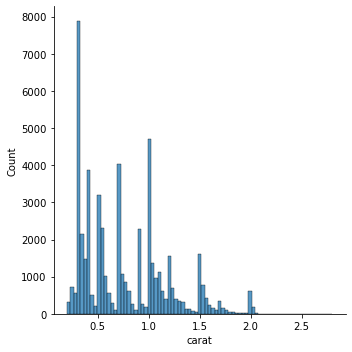

In [21]:
sns.displot(df.carat)

<AxesSubplot:xlabel='clarity', ylabel='price'>

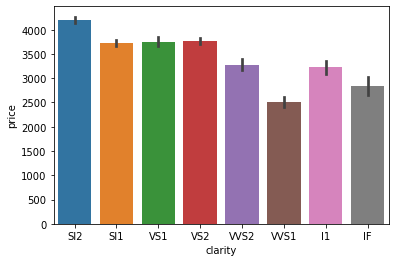

In [22]:
sns.barplot(data = df, x = df.clarity, y = df.price)

Diamond Clarity Chart
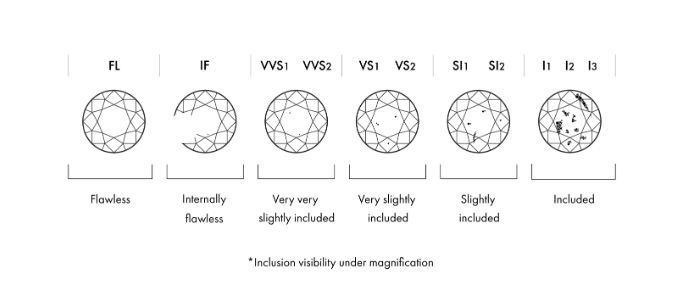

# Converting to 1NF

In [23]:
# using label encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [24]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [25]:
df['cut']=le.fit_transform(df['cut'])

In [26]:
df['cut'].unique()

array([2, 3, 1, 4, 0])

In [27]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [28]:
df['clarity']=le.fit_transform(df['clarity'])

In [29]:
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimensions
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [31]:
df['color']=le.fit_transform(df['color'])

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dimensions
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


# Model Creation

In [33]:
x=df.drop(['x', 'y', 'z', 'price'],axis=1)

In [34]:
x.head()

,carat,cut,color,clarity,depth,table,dimensions
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250


In [35]:
y=df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

R^2 score: 0.8685641360811212


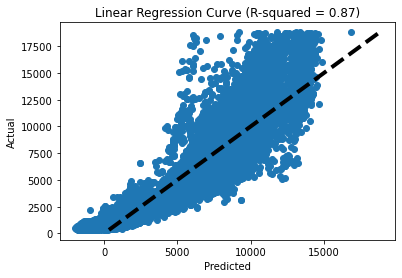

In [63]:
from sklearn.linear_model import LinearRegression
# sklearn method, which doesn't give much additional info

model = LinearRegression()
model.fit(X_train, y_train)

print(f'R^2 score: {model.score(X_train, y_train)}')

y_pred = model.predict(X_train)

# Calculate the R-squared value
r2 = r2_score(y_train, y_pred)

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Linear Regression Curve (R-squared = {:.2f})'.format(r2))
plt.show()

Out-of-bag R² score estimate: 0.981


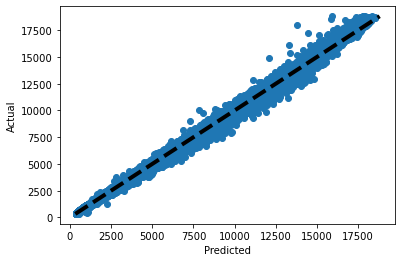

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Validation using out-of-bag method
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

print(f'Out-of-bag R\u00b2 score estimate: {rf.oob_score_:>5.3}')

y_pred = rf.predict(X_train)

# Calculate the R-squared value
r2 = r2_score(y_train, y_pred)

# Plot the linear regression curve
fig, ax = plt.subplots()
ax.scatter(y_pred, y_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()